In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import joblib

# Load the dataset
data_path = "../datasets/Phishing_Legitimate_full.csv"
pData = pd.read_csv(data_path)

In [3]:
# Separate features and target, and split the data
x = pData.drop(["id", "CLASS_LABEL"], axis=1, errors='ignore')
y = pData["CLASS_LABEL"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=2)

In [4]:
# Save feature names to a text file
with open("feature_names.txt", "w") as file:
    for feature in x.columns:
        file.write(f"{feature}\n")
print("Feature names saved to feature_names.txt")

Feature names saved to feature_names.txt


C:\Users\Jonriel Baloyo\AppData\Local\Temp\ipykernel_33944\3067569400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CLASS_LABEL", data=pData, palette="Set2")


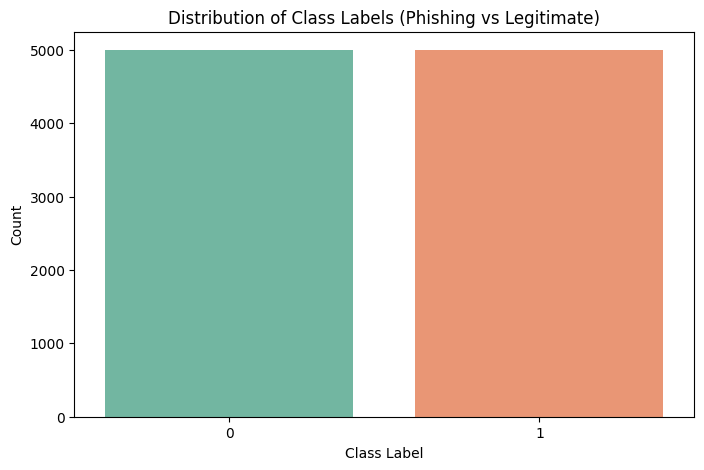

In [5]:
# Plot Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="CLASS_LABEL", data=pData, palette="Set2")
plt.title("Distribution of Class Labels (Phishing vs Legitimate)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

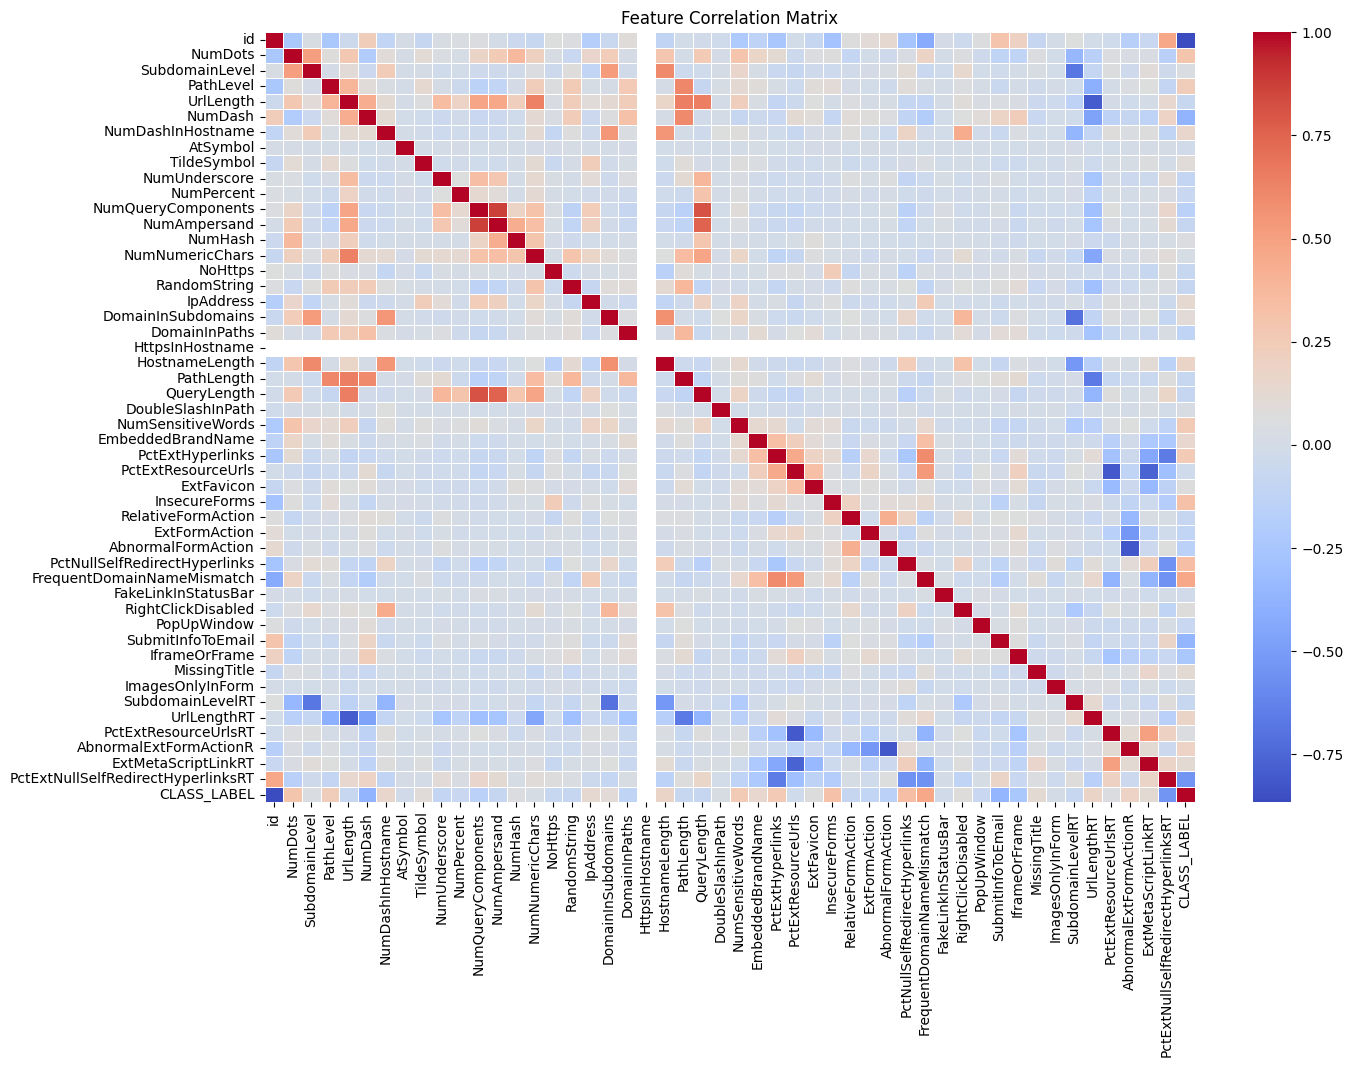

In [6]:
# Plot Feature Correlations (Heatmap)
plt.figure(figsize=(15, 10))
correlation_matrix = pData.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [7]:
# Train an XGBoost model to extract feature importances
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(xTrain, yTrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [8]:
# Save the trained model as a .pkl file
model_filename = "xgboost_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

Model saved as xgboost_model.pkl


In [9]:
# Evaluate model accuracy
score = model.score(xTrain, yTrain)
print(f"Model Accuracy: {score * 100:.2f}%")

Model Accuracy: 100.00%


In [10]:
# Get feature importances from the trained model
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

C:\Users\Jonriel Baloyo\AppData\Local\Temp\ipykernel_33944\313784207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


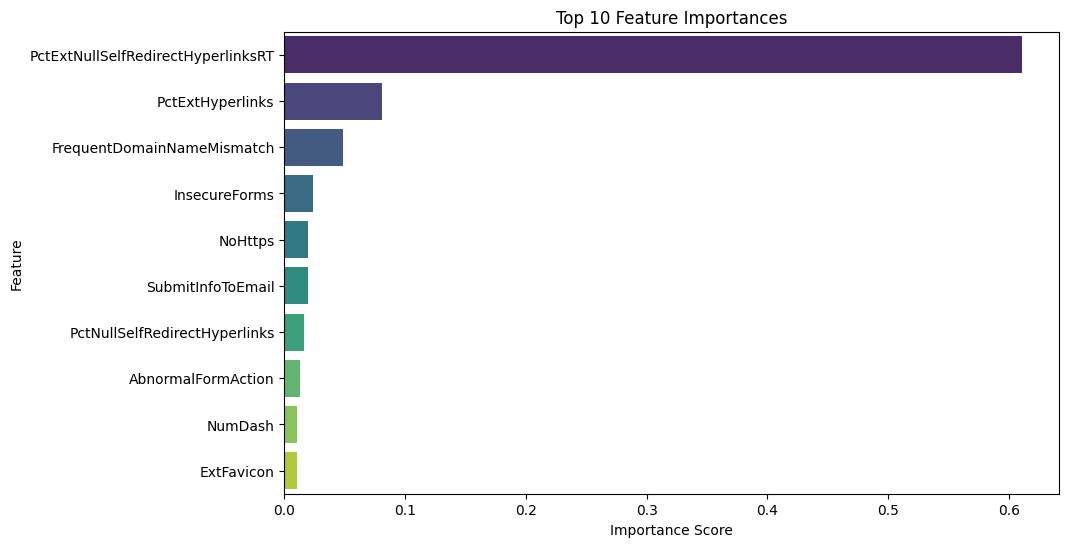

In [11]:
# Plot Top 10 Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [12]:
# Interactive Feature Importance with Plotly
fig = px.bar(importance_df, x='Importance', y='Feature', title='Top 10 Feature Importances (Interactive)',
             orientation='h', color='Importance', color_continuous_scale='viridis')
fig.show()

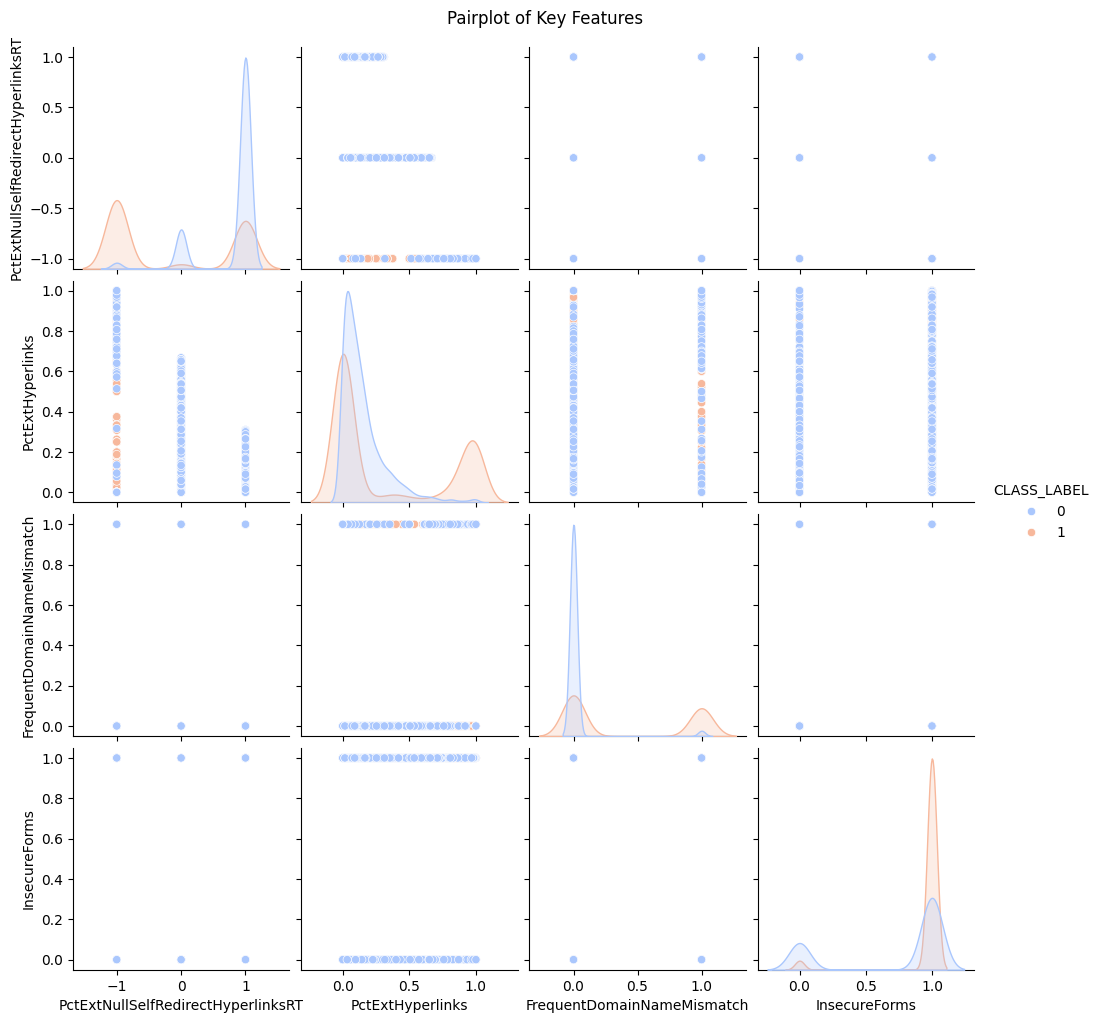

In [13]:
# Pairplot for Some Key Features
key_features = importance_df['Feature'].head(4).tolist()  # Selecting the top 4 features for pairplot
sns.pairplot(pData, vars=key_features, hue="CLASS_LABEL", palette="coolwarm")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


In [14]:
# Evaluate Model Performance on Test Data
y_pred = model.predict(xTest)
cm = confusion_matrix(yTest, y_pred)
cr = classification_report(yTest, y_pred)

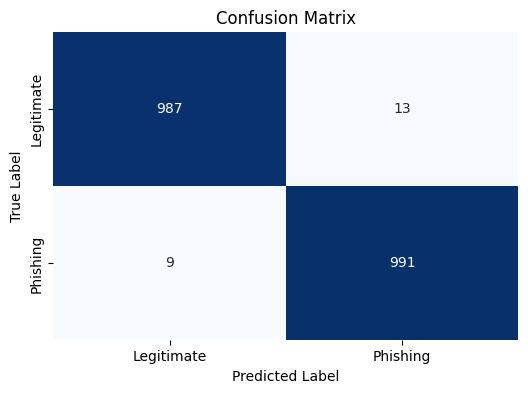

In [15]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Legitimate', 'Phishing'], 
            yticklabels=['Legitimate', 'Phishing'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
# Print Classification Report
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



Feature names saved to feature_names.txt


C:\Users\Jonriel Baloyo\AppData\Local\Temp\ipykernel_11620\3191112994.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




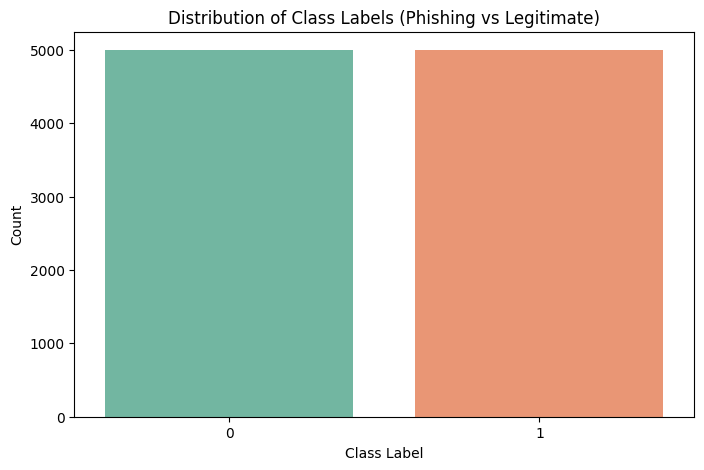

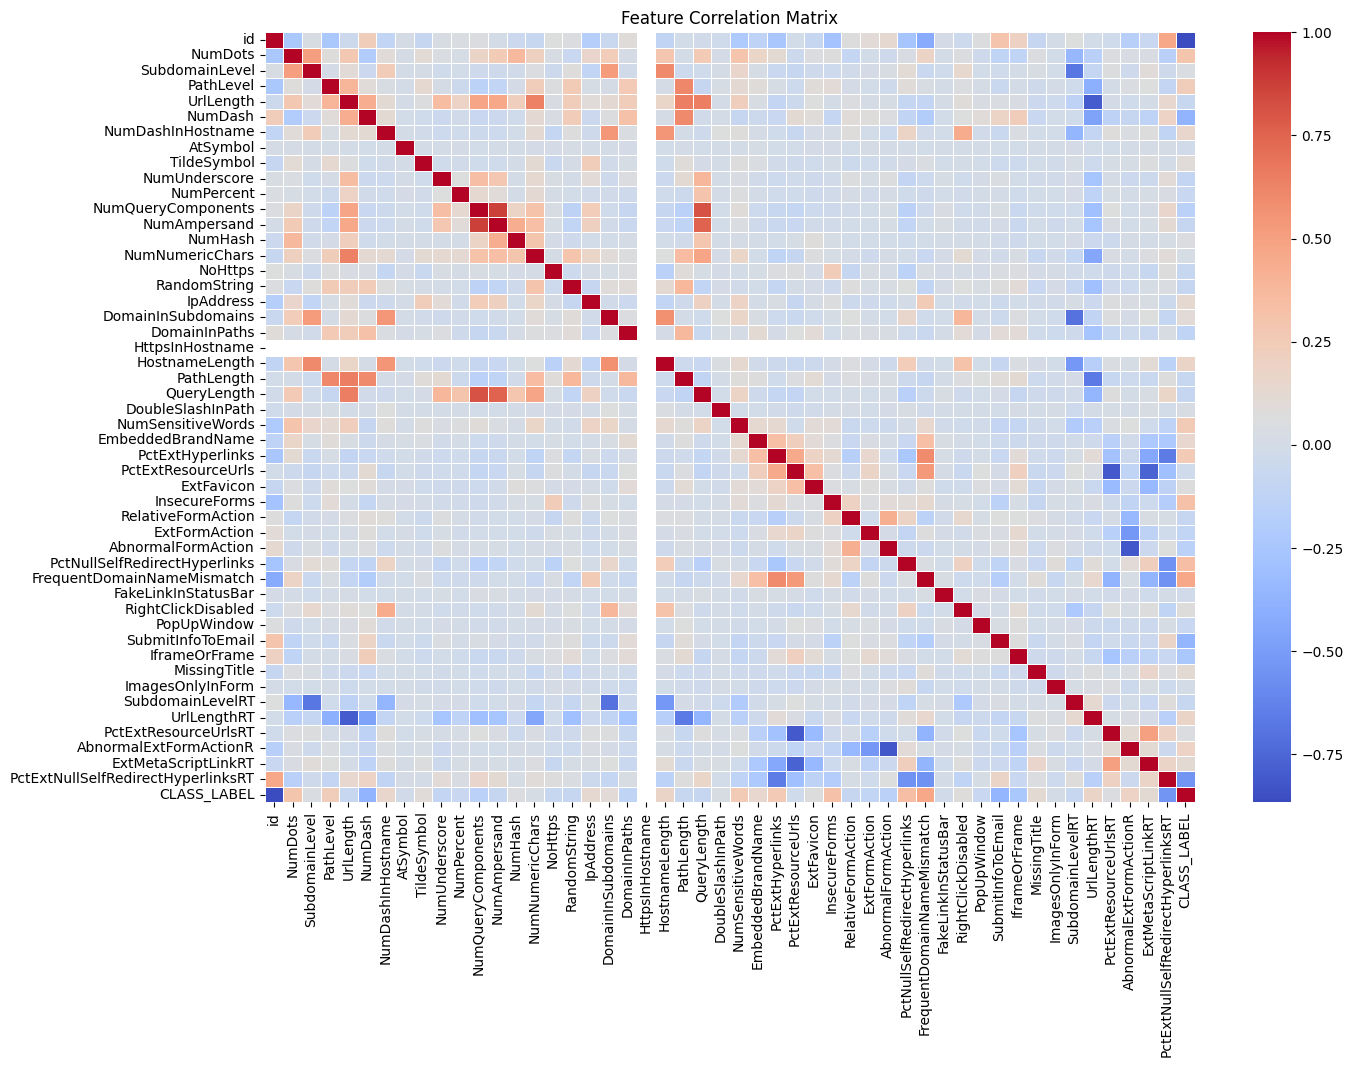

Model saved as xgboost_model.pkl


C:\Users\Jonriel Baloyo\AppData\Local\Temp\ipykernel_11620\3191112994.py:56: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




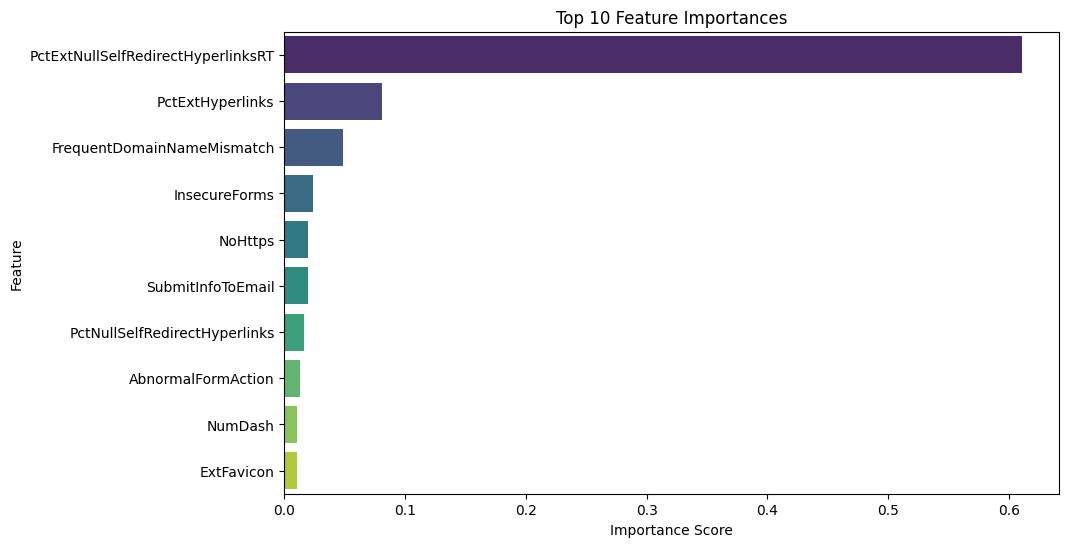

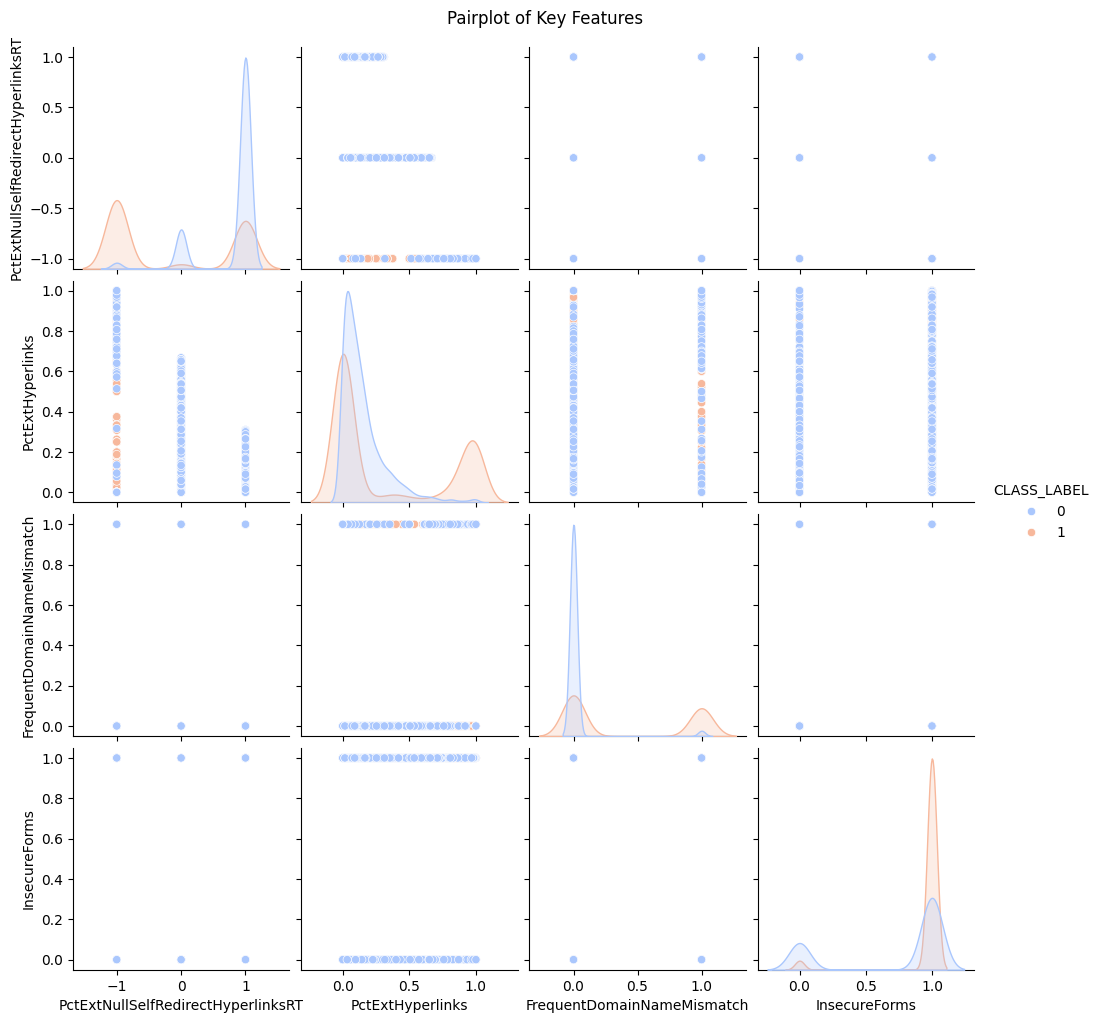

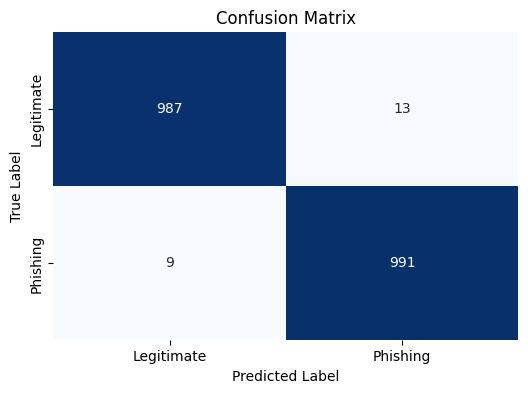

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import joblib

# Load the dataset
data_path = "../datasets/Phishing_Legitimate_full.csv"
pData = pd.read_csv(data_path)

# Separate features and target, and split the data
x = pData.drop(["id", "CLASS_LABEL"], axis=1, errors='ignore')
y = pData["CLASS_LABEL"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=2)

# Save feature names to a text file
with open("feature_names.txt", "w") as file:
    for feature in x.columns:
        file.write(f"{feature}\n")
print("Feature names saved to feature_names.txt")

# Plot Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="CLASS_LABEL", data=pData, palette="Set2")
plt.title("Distribution of Class Labels (Phishing vs Legitimate)")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

# Plot Feature Correlations (Heatmap)
plt.figure(figsize=(15, 10))
correlation_matrix = pData.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Train an XGBoost model to extract feature importances
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(xTrain, yTrain)

# Save the trained model as a .pkl file
model_filename = "xgboost_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

# Get feature importances from the trained model
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot Top 10 Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Interactive Feature Importance with Plotly
fig = px.bar(importance_df, x='Importance', y='Feature', title='Top 10 Feature Importances (Interactive)',
             orientation='h', color='Importance', color_continuous_scale='viridis')
fig.show()

# Pairplot for Some Key Features
key_features = importance_df['Feature'].head(4).tolist()  # Selecting the top 4 features for pairplot
sns.pairplot(pData, vars=key_features, hue="CLASS_LABEL", palette="coolwarm")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# Evaluate Model Performance on Test Data
y_pred = model.predict(xTest)
cm = confusion_matrix(yTest, y_pred)
cr = classification_report(yTest, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Legitimate', 'Phishing'], 
            yticklabels=['Legitimate', 'Phishing'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print Classification Report
print("Classification Report:\n", cr)
